**0. Import the data and declare your package dependencies.**

In [24]:
#libraries
import pandas as pd
from plotnine import ggplot, aes, geom_bar, facet_wrap, theme, element_text, labs, geom_col, geom_point, geom_density, coord_flip, theme_minimal, geom_boxplot, scale_fill_manual


In [25]:
#data
avocado = pd.read_csv('data/avocado-updated-2020.csv')

**1. Briefly describe the data set. What information does it contain?**

In [26]:
# "The dataset features historical data on avocado prices and sales volume in multiple cities, states, and regions of the USA" 
# "Contains data from 4 January 2015 up to 17 May 2020"
# - Kaggle

**2. Clean the data in any way you see fit.**

In [27]:
#data manipulation

#ensure that we save original dataset
avocado_clean = avocado

# converts the string to date format
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])

#split date to 3 variables
avocado_clean['year'] = avocado_clean['date'].dt.year
avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day

#rename columns for sizes based on 4046, 4225, and 4770
avocado_clean = avocado_clean.rename(columns={'4046': 'Small',
                                    '4225': 'Large',
                                    '4770': 'Xlarge'})

#converts string variables to categorical type
avocado_clean['type'] = avocado_clean['type'].astype('category')


**Exercises**

**3. Which major geographical region sold the most total organic, small Hass avocados in 2017?**


In [28]:
#select only the organic observations in the year 2017
organic = avocado_clean[(avocado["type"] == "organic") & (avocado_clean["year"] == 2017)]

#stores small_bags grouped by geography. gets the max and then sorts
#refrenced chat GPT
organic.groupby("geography")["Small"].sum().sort_values(ascending=False)

geography
Total U.S.              6882024.42
West                    1870206.29
South Central           1717104.19
California              1526290.58
Northeast                925832.36
Los Angeles              600718.66
New York                 599671.34
Denver                   556346.10
Houston                  498024.65
San Francisco            458478.55
Dallas/Ft. Worth         373197.18
Southeast                285124.34
Great Lakes              202487.68
Midsouth                 186395.50
Phoenix/Tucson           184084.38
Portland                 176110.47
Plains                   168583.40
Philadelphia             155009.91
Sacramento               112551.40
West Tex/New Mexico      110910.95
Las Vegas                 84601.96
Baltimore/Washington      73689.77
San Diego                 68489.39
Seattle                   63564.50
Orlando                   47517.68
Pittsburgh                47144.23
Atlanta                   46000.79
St. Louis                 45372.15
Columbus  

the West region is the most at 1870206.29 small avocados

**4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?**

In [29]:
#split the variables in the data cleaning step

#stores total_volume grouped by month. gets the max and then sorts
avocado_clean.groupby("month")["total_volume"].mean().sort_values(ascending=False)

month
5     1.123632e+06
2     1.095374e+06
6     1.051247e+06
4     1.016582e+06
3     9.957150e+05
1     9.853122e+05
7     9.832681e+05
8     9.499249e+05
9     9.064773e+05
10    8.446863e+05
11    8.223470e+05
12    8.076695e+05
Name: total_volume, dtype: float64

month 5 is the highest average volume of avocado sales (1.123632e+06)

**5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.**

In [30]:
#stores total_volume grouped by geography. gets the max and then sorts
avocado_clean.groupby("geography")["total_volume"].sum().sort_values(ascending=False)

geography
Total U.S.              1.209377e+10
West                    2.150049e+09
South Central           2.075908e+09
California              1.991888e+09
Northeast               1.541420e+09
Southeast               1.381324e+09
Great Lakes             1.220448e+09
Midsouth                1.097477e+09
Los Angeles             9.593505e+08
Plains                  6.352576e+08
New York                5.282452e+08
Dallas/Ft. Worth        4.362042e+08
Houston                 4.208438e+08
Phoenix/Tucson          3.825234e+08
West Tex/New Mexico     2.806116e+08
Denver                  2.779295e+08
Baltimore/Washington    2.767646e+08
San Francisco           2.742169e+08
Chicago                 2.576650e+08
Miami/Ft. Lauderdale    2.317448e+08
Portland                2.135438e+08
Boston                  2.041325e+08
Seattle                 2.024026e+08
Atlanta                 1.989941e+08
San Diego               1.737644e+08
Philadelphia            1.584327e+08
Northern New England    1.56

Los Angeles sold the most total avocados (9.593505e+08 avocados)

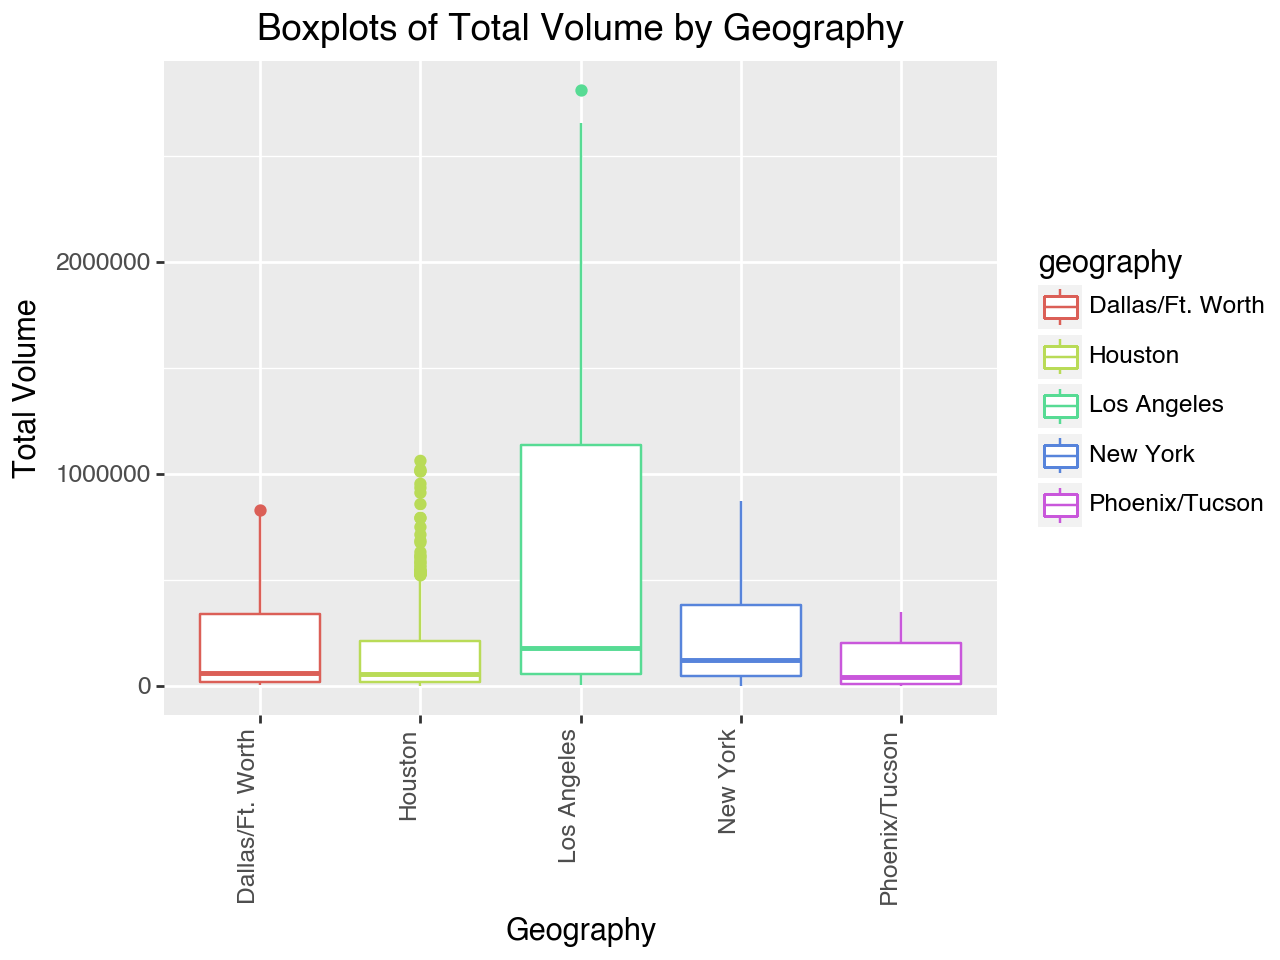

In [31]:
#top 5 metro geographical regions:
# los angeles
# new york
# houston
# pheonix 
# dallas
#filter data to only include those 5 regions
top_5 = avocado_clean[(avocado["geography"] == "Los Angeles") | (avocado_clean["geography"] == "New York") | (avocado_clean["geography"] == "Houston") | (avocado_clean["geography"] == "Phoenix/Tucson") | (avocado_clean["geography"] == "Dallas/Ft. Worth")]

#side-by-side box plot
(ggplot(top_5, aes(x='geography', y='small_bags', color = 'geography'))
    + geom_boxplot()
    + theme(axis_text_x=element_text(angle=90, hjust=1))
    + labs(title='Boxplots of Total Volume by Geography', x='Geography', y='Total Volume')
)

**Pivoting**

**6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.**

In [32]:
#filters avocado_clean to only contain the desired california regions
california = avocado_clean[(avocado["geography"] == "Los Angeles") | (avocado_clean["geography"] == "San Diego") | (avocado_clean["geography"] == "Sacramento") | (avocado_clean["geography"] == "San Francisco")]


**7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.**

In [33]:
#see which region the price of organic versus conventional is most different
california.groupby(["type", "geography"])["average_price"].mean().sort_values(ascending=False)

<positron-console-cell-33>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


type          geography    
organic       San Francisco    2.119444
              Sacramento       1.873856
              San Diego        1.798366
              Los Angeles      1.574902
conventional  San Francisco    1.400490
              Sacramento       1.295359
              San Diego        1.113856
              Los Angeles      1.047124
Name: average_price, dtype: float64

average price difference between organic and convertional per region:

- san francisco: $.527 more for organic
- sacramento: $0.578 more for organic
- san diego: $0.684 more for organic
- los angeles: $0.718 more for organic

So los angeles has the biggest difference between the price of organic versus conventional avocados

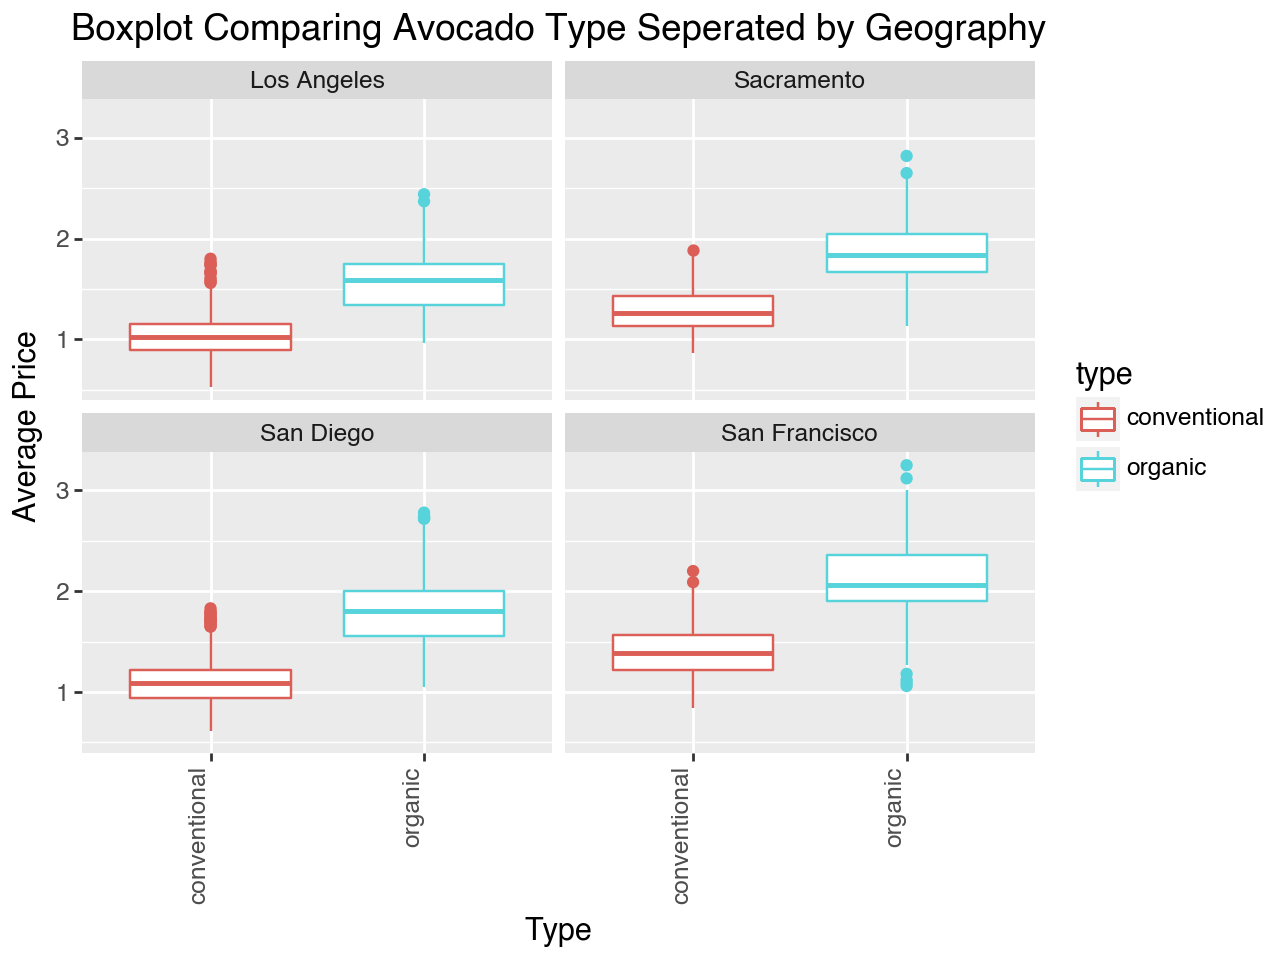

In [34]:
#boxplot using facet_wrap for region
(ggplot(california, aes(x='type', y='average_price', color = 'type'))
    + geom_boxplot()
    + facet_wrap('geography')
    + theme(axis_text_x=element_text(angle=90, hjust=1))
    + labs(title='Boxplot Comparing Avocado Type Seperated by Geography', x='Type', y='Average Price')
)

**8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.**

![image info](plots/plot1.png)

In [35]:
#pivots long our california dataset
#specifically for columns: small, large, and xlarge
#new variable: size
#new variable val: bag_value
long_california = pd.melt(california, id_vars=['geography', 'type', 'average_price'], value_vars=["Small", "Large", "Xlarge"], 
                            var_name="size", value_name="bag_value")



#rearranges variables so that it appears in right order on the plot
#Refrenced chat GPT
long_california['size'] = pd.Categorical(long_california['size'], categories=['Xlarge', 'Large', 'Small'], ordered=True)


print(long_california)

          geography          type  average_price    size   bag_value
0       Los Angeles  conventional           0.85   Small  1837999.65
1       Los Angeles       organic           1.25   Small    47721.51
2        Sacramento  conventional           1.05   Small   110693.69
3        Sacramento       organic           1.33   Small     3727.52
4         San Diego  conventional           0.94   Small   244152.26
...             ...           ...            ...     ...         ...
7339     Sacramento       organic           1.43  Xlarge        0.00
7340      San Diego  conventional           1.12  Xlarge     7210.47
7341      San Diego       organic           1.95  Xlarge        0.00
7342  San Francisco  conventional           1.50  Xlarge     5597.21
7343  San Francisco       organic           1.87  Xlarge        0.00

[7344 rows x 5 columns]
          geography          type  average_price    size   bag_value
0       Los Angeles  conventional           0.85   Small  1837999.65
1       L

In [36]:
#plot design:

#plot type = barplot
#x = region
#y = proportion by average hass avocado sales
#facet_wrap = avocado type

custom_colors = {
    'Xlarge': '#8d1cff',
    'Large': '#03c47a',
    'Small': '#fe7b00',
}

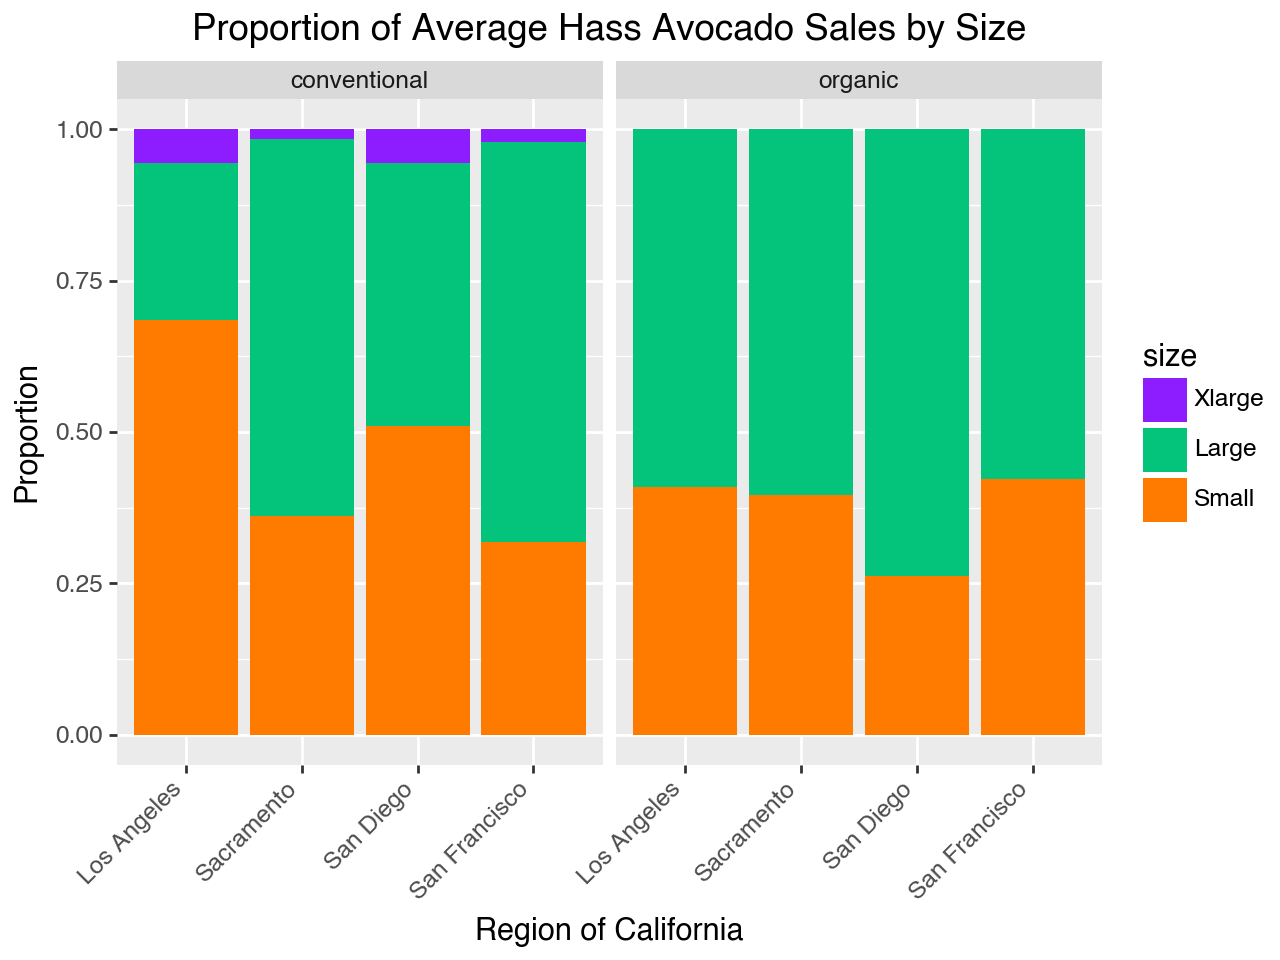

In [37]:
#ggplot
(ggplot(long_california, aes(x='geography', y='bag_value', fill='size'))
    #geom_bar, # Use 'fill' to show proportions
    + geom_bar(stat = 'identity', position='fill') 
    + scale_fill_manual(values=custom_colors) 
    #two plots for type
    + facet_wrap('type')
    #adjusts xaxis text angle to 45 degrees
    + theme(axis_text_x=element_text(angle=45, hjust=1)) 
    #titles
    + labs(title='Proportion of Average Hass Avocado Sales by Size', x='Region of California', y='Proportion')
)


**Using Outside Data**

A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

In [38]:

#dataframe of california housing using CHAT GPT
california_housing = pd.DataFrame({
    'geography': ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco'],
    'average_house_price': [900000, 800000, 450000, 1500000],
    'median_house_price': [750000, 700000, 400000, 1350000],
    'price_per_sqft': [700, 650, 300, 1000],
    'housing_sales_volume': [20000, 15000, 10000, 12000]
})


In [39]:
#join long_california and california_housing datasets
california_combined = pd.merge(california_housing, long_california, on='geography')

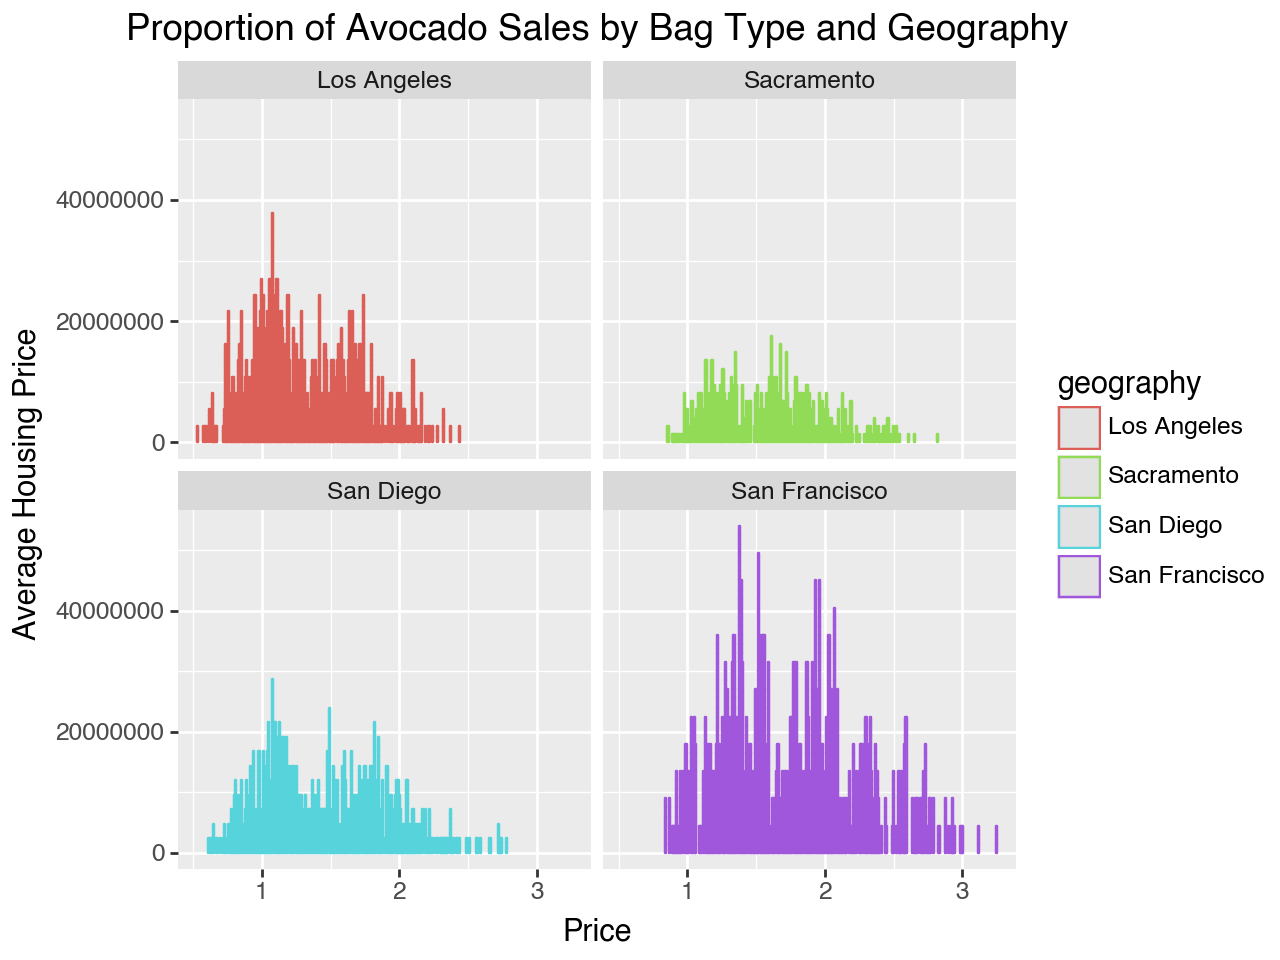

In [45]:
#geom_col
(ggplot(california_combined, aes(x='average_price', y='average_house_price', color = 'geography'))
    #fill to show proportions
    + geom_col(alpha = .1) 
    #wraps for geography
    + facet_wrap('geography')
    + labs(title='Proportion of Avocado Sales by Bag Type and Geography', x='Price', y='Average Housing Price')
)

#this plot is measuring the height on the y based on the frequency of the occurence + the actual average cost of living. 

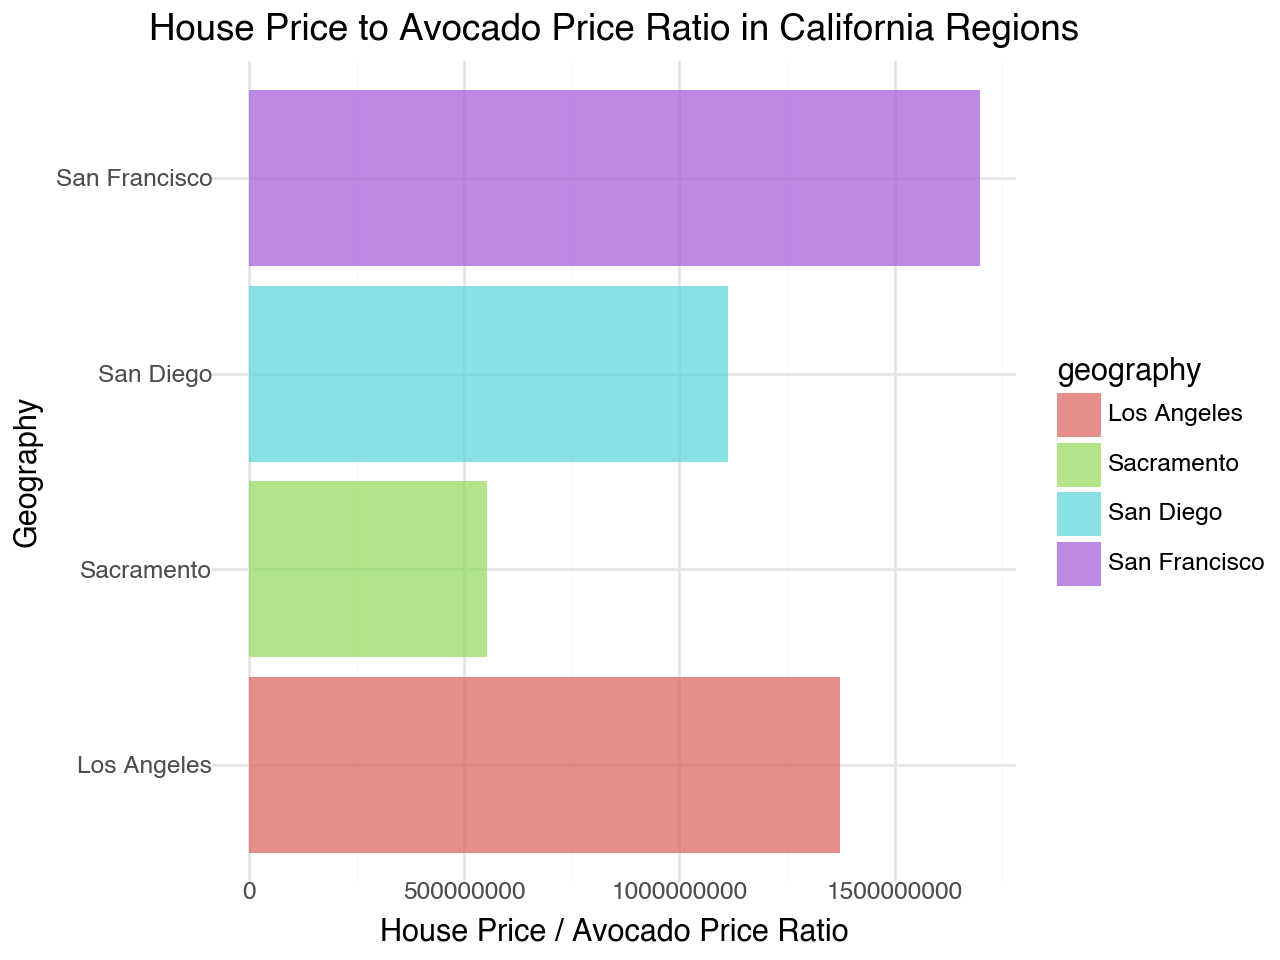

In [41]:
# price ratio to show change in average_house_price based on the avocado price
california_combined['price_ratio'] = california_combined['average_house_price'] / california_combined['average_price']

#bar plot
#x/fill = geography
#y = price ratio
(ggplot(california_combined, aes(x='geography', y='price_ratio', fill='geography'))
        + geom_bar(stat='identity', alpha=0.7)
        #rotates bars
        + coord_flip()
        #titles
        + labs(title='House Price to Avocado Price Ratio in California Regions',
               x='Geography',
               y='House Price / Avocado Price Ratio')
        + theme_minimal()
       )

- This bar chart visualizes the ratio of house prices to avocado prices for each region.
- A higher bar indicates a greater disparity between house and avocado prices. (This would means that avacodo prices has a negative correlation with housing prices.)
- As avocado prices go up, the housing market goes down. 
- So people really are spending all their money on avocado toast.